# Classification of MNIST dataset digits
## Labels = 10
## Training Samples =  60,000
## Testing Samples =   10,000

In [ ]:
# Modules
from PIL import Image
import dhash
import numpy as np
import scipy
from keras.datasets import mnist
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn import metrics

%matplotlib inline
np.random.seed(123)  # for reproducibility


## 2. Load MNIST data from keras

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

def Ahash(Img, size):
    Img  = Image.fromarray(Img).resize((size,size)).getdata()
    Img = np.array(list(Img))
    bool_image = Img > np.mean(Img)
    Ahash_ = np.zeros(len(bool_image))
    Ahash_[bool_image] = int(1)

    return Ahash_


## 3. Image Hashing on rows and columns  for training set

In [4]:
# size of image and output format
size = 4
X = X_train

#preallocate
X_train_hashed = np.zeros((X.shape[0], size**2));

for idx , Img in enumerate(X):
    X_train_hashed[idx,:]  = Ahash(Img, size)

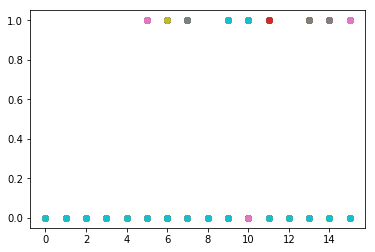

In [11]:
plt.plot(X_train_hashed[0:100,:].T,'o');

## 4. Image Hashing on rows and columns  for training set

In [12]:
X = X_test
X_test_hashed = np.zeros((X.shape[0], size**2));

for idx , Img in enumerate(X):
    X_test_hashed[idx,:]  = Ahash(Img, size)

## 6. Random Forest Classifier 

In [13]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100)
RFC = RFC.fit(X_train_hashed, Y_train)
y_pred = RFC.predict(X_test_hashed)

In [14]:
Yreal = Y_test
Ypred = y_pred
print("Classification Report:\n%s" % metrics.classification_report(Y_test, Ypred))
print("Cohen kappa Score:\n%s" % metrics.cohen_kappa_score(Y_test, Ypred))
print("Hamming Loss Score:\n%s" % metrics.hamming_loss(Y_test, Ypred))

Classification Report:
             precision    recall  f1-score   support

          0       0.74      0.69      0.71       980
          1       0.42      0.90      0.57      1135
          2       0.61      0.42      0.50      1032
          3       0.46      0.39      0.42      1010
          4       0.61      0.53      0.57       982
          5       0.40      0.17      0.24       892
          6       0.58      0.46      0.51       958
          7       0.46      0.60      0.52      1028
          8       0.41      0.28      0.34       974
          9       0.43      0.47      0.45      1009

avg / total       0.51      0.50      0.49     10000

Cohen kappa Score:
0.442469836777
Hamming Loss Score:
0.5002


In [15]:
param_grid = {'n_estimators':sp_randint(2, X_train_hashed.shape[1])}
RFC = RandomForestClassifier()
clf = RandomizedSearchCV(RFC, param_grid, n_jobs=-1, verbose=1, cv = 4)
clf.fit(X_train_hashed, Y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.2s finished


RandomizedSearchCV(cv=4, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1133d6908>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=1)

In [16]:
Yreal = Y_test
Ypred = clf.best_estimator_.predict(X_test_hashed)
print("Classification Report:\n%s" % metrics.classification_report(Y_test, Ypred))
print("Cohen kappa Score:\n%s" % metrics.cohen_kappa_score(Y_test, Ypred))
print("Hamming Loss Score:\n%s" % metrics.hamming_loss(Y_test, Ypred))

Classification Report:
             precision    recall  f1-score   support

          0       0.75      0.68      0.72       980
          1       0.42      0.90      0.57      1135
          2       0.60      0.43      0.50      1032
          3       0.47      0.38      0.42      1010
          4       0.61      0.53      0.57       982
          5       0.41      0.16      0.23       892
          6       0.58      0.46      0.51       958
          7       0.46      0.60      0.52      1028
          8       0.41      0.30      0.34       974
          9       0.43      0.47      0.45      1009

avg / total       0.51      0.50      0.49     10000

Cohen kappa Score:
0.443002279466
Hamming Loss Score:
0.4997


In [17]:
clf.best_params_

{'n_estimators': 3}